### Collect feature data from Spotify API using spotipy library

In [1]:
%load_ext autoreload

In [2]:
from cap_package import SpotipyCollect as sc
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas import json_normalize
from pathlib import Path
import seaborn as sns
%autoreload 2

... OK (Got response in 3.19 seconds)
Writing emoji data to C:\Users\Administrator\.demoji\codes.json ...
... OK


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [4]:
load_dotenv()
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
REDIRECT_URI = os.getenv('REDIRECT_URI')
USERNAME = os.getenv('SPOTIFY_USERNAME')
SCOPE = 'playlist-read-private'
PATH = os.getenv('PATH_DATASET1.2')

Hierachy:
- spotipy_userauth
- Using USER's playlist: get_pl_details >  playlist_id_url > arg(extract_playlists,)

- get_folder_features
  > get_playlist_features 
     >> track_features_to_df, get_tracks
        >>> get_track_features

In [5]:
# get spotify authorization 
sp = sc.spotipy_userauth(USERNAME, SCOPE, CLIENT_ID, CLIENT_SECRET, REDIRECT_URI)
# set path
path = Path(PATH)

In [6]:
# get user playlist details - specifically : name, id, url and total number of tracks
pl_Name_, pl_ID_, pl_URL_, pltot_Tracks_ = sc.get_pl_details(sp, USERNAME)
print('Sample playlist names:', pl_Name_[:3])

Sample playlist names: ["Today's Top Hits", 'Deep house', 'Progressive House']


In [7]:
# Filter, sort and choose relevant playlists
filsort_pl = sc.filtersort_playlists(pl_Name_, pl_ID_, pl_URL_, pltot_Tracks_, start=1, pl_range = 18)[2:-2]
print("Let's see a sample:\n")
filsort_pl

Let's see a sample:



[(50,
  'That familiar trance',
  '3PH2J5HkKhhMoxWj3W0jk8',
  'https://api.spotify.com/v1/playlists/3PH2J5HkKhhMoxWj3W0jk8/tracks'),
 (49,
  'House-Trance',
  '2RnR5cw9kJUc9onu4WSRrW',
  'https://api.spotify.com/v1/playlists/2RnR5cw9kJUc9onu4WSRrW/tracks'),
 (36,
  'Our old school trance',
  '7HUclibRF0h57pVvXr3g9v',
  'https://api.spotify.com/v1/playlists/7HUclibRF0h57pVvXr3g9v/tracks'),
 (35,
  'Classic progressive',
  '7k5wrlGBdrXCtAQ1vNGC7J',
  'https://api.spotify.com/v1/playlists/7k5wrlGBdrXCtAQ1vNGC7J/tracks'),
 (32,
  'Progressive 4',
  '53kl8WegufR0IqMgyklXEL',
  'https://api.spotify.com/v1/playlists/53kl8WegufR0IqMgyklXEL/tracks'),
 (27,
  'Deep house',
  '6aQz1t74RjRrUAK6NcPGcf',
  'https://api.spotify.com/v1/playlists/6aQz1t74RjRrUAK6NcPGcf/tracks'),
 (26,
  'Progressive 2',
  '2IlSKDObaH9jwLJQcqiv2Y',
  'https://api.spotify.com/v1/playlists/2IlSKDObaH9jwLJQcqiv2Y/tracks'),
 (23,
  'Our old school trance 2',
  '43sMbiw98RFTH2WjmbTidr',
  'https://api.spotify.com/v1/playlist

In [8]:
feat_dic = sc.get_folder_features(sp, filsort_pl)

In [9]:
feat_dic['Classic progressive'].head()

,name,artists_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Skylarking - Original Mix,BT,0.290,0.656,11,-8.673,0,0.0365,0.149000,0.824,0.0831,0.1990,127.977,audio_features,74fpYY4lCS82Jgqf1DqD3Z,spotify:track:74fpYY4lCS82Jgqf1DqD3Z,https://api.spotify.com/v1/tracks/74fpYY4lCS82...,https://api.spotify.com/v1/audio-analysis/74fp...,644663,4
1,Relaxation [Mix Cut],Track4Sale,0.652,0.821,11,-6.567,0,0.0372,0.003850,0.846,0.2870,0.0660,123.929,audio_features,5td0mR55Kg8MTHAm27GYEC,spotify:track:5td0mR55Kg8MTHAm27GYEC,https://api.spotify.com/v1/tracks/5td0mR55Kg8M...,https://api.spotify.com/v1/audio-analysis/5td0...,348502,4
2,Rift - Original Mix,Matt Lange,0.728,0.584,6,-8.633,0,0.0455,0.000628,0.806,0.2010,0.5040,128.152,audio_features,6a00XPPDWpUeNDbGhRAAch,spotify:track:6a00XPPDWpUeNDbGhRAAch,https://api.spotify.com/v1/tracks/6a00XPPDWpUe...,https://api.spotify.com/v1/audio-analysis/6a00...,389587,4
3,Solstice - Original Mix,Embliss,0.757,0.453,2,-16.288,1,0.0429,0.008990,0.791,0.0950,0.2070,127.003,audio_features,2hOTWEDeqj5lg2SDUg2zAY,spotify:track:2hOTWEDeqj5lg2SDUg2zAY,https://api.spotify.com/v1/tracks/2hOTWEDeqj5l...,https://api.spotify.com/v1/audio-analysis/2hOT...,463145,4
4,Offshore [ABGT190] - Grum Remix,"Chicane, Grum",0.587,0.832,5,-11.342,0,0.0321,0.003890,0.263,0.4580,0.0989,126.872,audio_features,4K5WUbOu7FAZn9MREoLOpi,spotify:track:4K5WUbOu7FAZn9MREoLOpi,https://api.spotify.com/v1/tracks/4K5WUbOu7FAZ...,https://api.spotify.com/v1/audio-analysis/4K5W...,257556,4


In [10]:
path_ = path.joinpath('user_pl_feat')
nulls =[]
folder_transform = {}
for pl, feat_df in feat_dic.items():
    
    # check for null values
    if feat_df.isnull().sum().sum() > 0:
        # record playlist name and row indices of dataframe with missing values
        nulls.append((pl, feat_df[feat_df.isnull().any(axis=1)].index))
        print('Found missing values')

    # initiate transformer    
    column_trans = make_column_transformer(
                        (MinMaxScaler(),['danceability', 'energy', 'loudness', 'speechiness', 
                                'acousticness', 'instrumentalness', 'valence', 'tempo']),
                        (OneHotEncoder(categories=[[0,1,2,3,4,5,6,7,8,9,10,11]]), ['key']),
                         remainder='passthrough')

    # Define column names in order they are transformed
    col_names =  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'valence', 'tempo'] + ['key_{}'.format(i) for i in range(12)]
    df_col_name = [x for x in list(feat_df.columns) if x not in col_names+['key']]

    col_names = col_names + df_col_name
    # fit, transform and convert to a dataframe
    std_feat_df = pd.DataFrame(column_trans.fit_transform(feat_df), columns=col_names)
    
    folder_transform[pl] = std_feat_df
    # save dataframe as parquet
    #std_feat_df.to_parquet(path_.joinpath('{}_features.parquet'.format(pl)), engine='pyarrow')


In [11]:
folder_transform['Classic progressive'].head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,key_0,key_1,...,artists_name,mode,liveness,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.38447,0.604845,0.0139727,0.34597,0.872446,0.295284,0.442516,0,0,...,BT,0,0.0831,audio_features,74fpYY4lCS82Jgqf1DqD3Z,spotify:track:74fpYY4lCS82Jgqf1DqD3Z,https://api.spotify.com/v1/tracks/74fpYY4lCS82...,https://api.spotify.com/v1/audio-analysis/74fp...,644663,4
1,0.738776,0.69697,0.772121,0.0161956,0.00813231,0.896227,0.0638594,0.217365,0,0,...,Track4Sale,0,0.287,audio_features,5td0mR55Kg8MTHAm27GYEC,spotify:track:5td0mR55Kg8MTHAm27GYEC,https://api.spotify.com/v1/tracks/5td0mR55Kg8M...,https://api.spotify.com/v1/audio-analysis/5td0...,348502,4
2,0.893878,0.248106,0.608022,0.0425532,0.000633082,0.852989,0.825996,0.45225,0,0,...,Matt Lange,0,0.201,audio_features,6a00XPPDWpUeNDbGhRAAch,spotify:track:6a00XPPDWpUeNDbGhRAAch,https://api.spotify.com/v1/tracks/6a00XPPDWpUe...,https://api.spotify.com/v1/audio-analysis/6a00...,389587,4
3,0.953061,0,0,0.0342966,0.0200957,0.836774,0.309205,0.388342,0,0,...,Embliss,1,0.095,audio_features,2hOTWEDeqj5lg2SDUg2zAY,spotify:track:2hOTWEDeqj5lg2SDUg2zAY,https://api.spotify.com/v1/tracks/2hOTWEDeqj5l...,https://api.spotify.com/v1/audio-analysis/2hOT...,463145,4
4,0.606122,0.717803,0.392851,0,0.00822541,0.266025,0.121107,0.381056,0,0,...,"Chicane, Grum",0,0.458,audio_features,4K5WUbOu7FAZn9MREoLOpi,spotify:track:4K5WUbOu7FAZn9MREoLOpi,https://api.spotify.com/v1/tracks/4K5WUbOu7FAZ...,https://api.spotify.com/v1/audio-analysis/4K5W...,257556,4


In [12]:
df_list = [df for pl, df in folder_transform.items()]    
full_df = pd.concat(df_list, axis=0, ignore_index=True)
#full_df_.tail()

In [13]:
cov_mat = np.corrcoef(full_df.iloc[:,0:8].astype('float32'), rowvar=False)

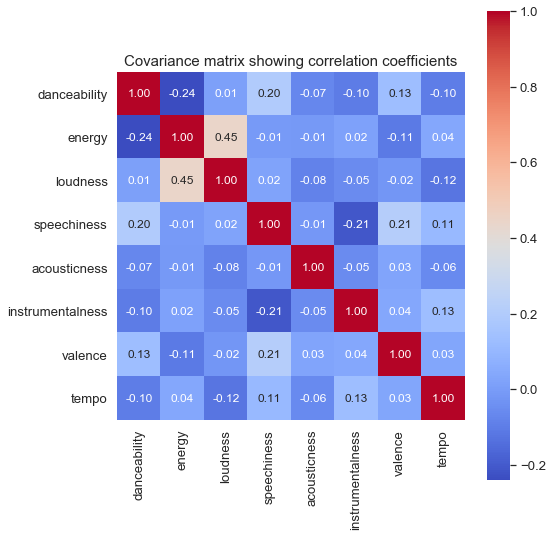

In [14]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
cols = list(full_df.iloc[:,0:8].columns)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 15)
plt.tight_layout()
plt.show()